THIS NOTEBOOK SHOWS THE IMPLEMENTATION OF RANDOM FOREST ALGORITHM FOR CAR EVALUATION MODEL

STEPS:
      1] GET THE DATA AND DEFINE THE FEATURES
      
      2] SPLIT THE DATA INTO TRAIN AND TEST 
      
      3] ENCODE THE DATA
      
      4] RANDOM FOREST CLASSIFIER WITH DEFAULT PARAMETERS
      
      5] RANDOM FOREST CLASSIFIER WITH 100 DECISION TREES

IMPORTING ESSENTIAL LIBRARIES

In [54]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [55]:
data=pd.read_csv("car_evaluation.csv",header=None)
print(data.shape)
print(data.head())

(1728, 7)
       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


.

NAMING THE FEATURES FOR THE CAR EVALUATION DATA 

In [56]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


.

TRAIN TEST SPLIT

In [57]:
X = data.drop(['class'], axis=1)
y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

.

ENCODING THE DATA USING CATEGORICAL ENCODER

In [58]:
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder.fit(X_train)
X_train=encoder.transform(X_train)
X_test=encoder.transform(X_test)

.

 RANDOM FOREST CLASSIFIER WITH DEFAULT PARAMETERS [10 DECISION TREES]

In [59]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [60]:
print("The accuracy score of the default number of parameters is " , accuracy_score(y_pred,y_test))

The accuracy score of the default number of parameters is  0.9439579684763573


.

RANDOM FOREST CLASSIFIER WITH 100 DECISION TREES

In [61]:
rfc_100=RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train,y_train)
y_pred_100=rfc.predict(X_test)

In [62]:
print("The accuracy score of the default number of parameters is " , accuracy_score(y_pred_100,y_test))

The accuracy score of the default number of parameters is  0.9439579684763573


In [63]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.296450
persons     0.242734
maint       0.146480
buying      0.138759
lug_boot    0.101254
doors       0.074322
dtype: float64

C:\Users\Sathish\ML - 2\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sathish\ML - 2\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sathish\ML - 2\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


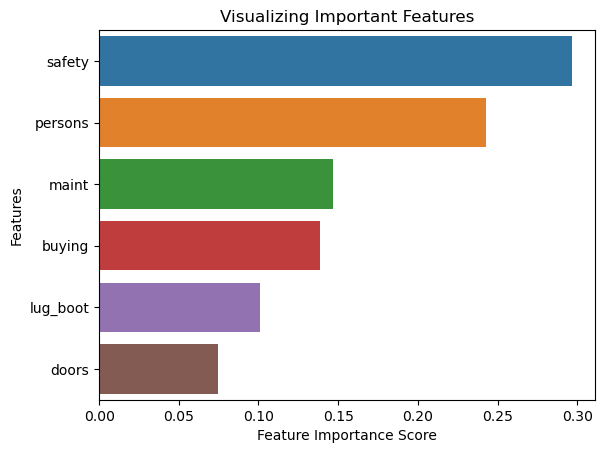

In [66]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()